In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load the data
df = pd.read_csv('data/all_securities.csv', header = 0)

In [3]:
# Transform 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [45]:
start_date = '2022-01-01'
end_date_training = '2022-08-31'
start_date_testing= '2022-09-01'
end_date_testing = '2022-09-30'

training_data = df.loc[start_date:end_date_training]
testing_data = df.loc[start_date_testing:end_date_testing]

In [52]:
X_train=training_data[['VTSAX_Close', 'XLK_Close', 'SNP_Close']]
X_test=testing_data[['VTSAX_Close', 'XLK_Close', 'SNP_Close']]
y_train=training_data['DELL_Close']
y_test=testing_data['DELL_Close']

In [53]:
# Fit the linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             DELL_Close   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.201e+04
Date:                Wed, 17 Apr 2024   Prob (F-statistic):                   6.61e-192
Time:                        17:51:50   Log-Likelihood:                         -439.79
No. Observations:                 167   AIC:                                      885.6
Df Residuals:                     164   BIC:                                      894.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [54]:
# Make predictions on the test set
y_pred_test = results.predict(X_test)

# Calculate MSE on the test set
mse_test = mean_squared_error(y_test, y_pred_test)

# Return MSE on the test set
print("Mean Squared Error on Test Data:", mse_test)

Mean Squared Error on Test Data: 44.69304120411537


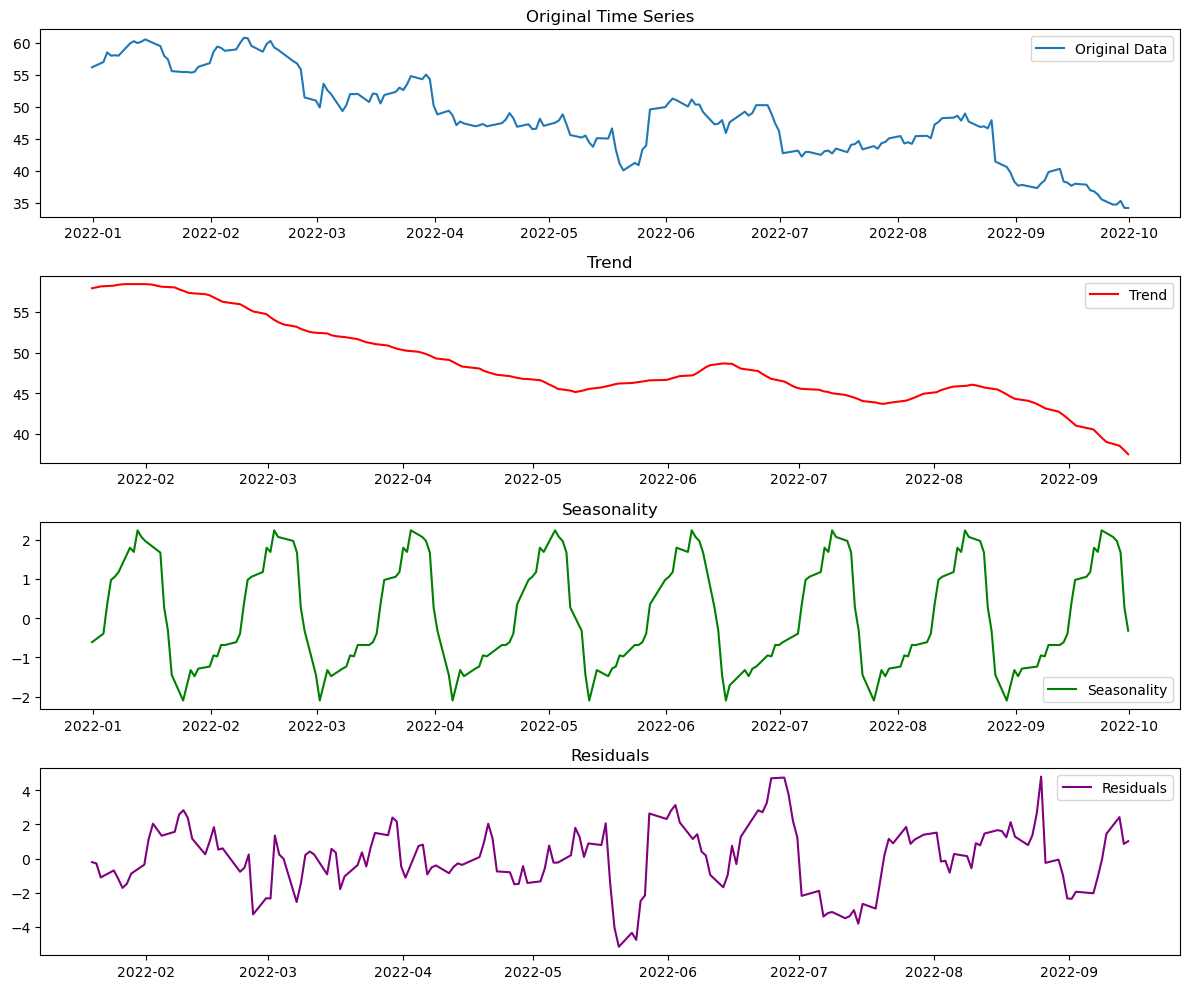

In [55]:

# Decompose the time series into its components
decomposition = seasonal_decompose(df['DELL_Close'], model='additive',period=25)

# Plot the original time series
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(df.index, df['DELL_Close'], label='Original Data')
plt.legend()
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(df.index, decomposition.trend, label='Trend', color='red')
plt.legend()
plt.title('Trend')

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(df.index, decomposition.seasonal, label='Seasonality', color='green')
plt.legend()
plt.title('Seasonality')

# Plot the residuals (remainder after removing trend and seasonality)
plt.subplot(4, 1, 4)
plt.plot(df.index, decomposition.resid, label='Residuals', color='purple')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [56]:
# Fit ARIMA model to training data
arima_model = ARIMA(training_data['DELL_Close'], order=(5,1,0))
arima_result = arima_model.fit()



/Users/henryfeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryfeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryfeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [57]:
# Extract residuals
residuals = arima_result.resid

residuals

Date
2022-01-03 16:00:00    56.980000
2022-01-04 16:00:00     1.509993
2022-01-05 16:00:00    -0.613266
2022-01-06 16:00:00    -0.063024
2022-01-07 16:00:00     0.038271
                         ...    
2022-08-25 16:00:00     1.372237
2022-08-26 16:00:00    -6.489001
2022-08-29 16:00:00    -0.561064
2022-08-30 16:00:00    -0.160119
2022-08-31 16:00:00    -1.533533
Length: 167, dtype: float64

In [58]:
# Make predictions on testing data
y_pred_test = arima_result.forecast(steps=len(testing_data))

testing_data['DELL_Close']

/Users/henryfeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Date
2022-09-01 16:00:00    37.65
2022-09-02 16:00:00    37.79
2022-09-06 16:00:00    37.29
2022-09-07 16:00:00    37.98
2022-09-08 16:00:00    38.50
2022-09-09 16:00:00    39.79
2022-09-12 16:00:00    40.30
2022-09-13 16:00:00    38.30
2022-09-14 16:00:00    38.13
2022-09-15 16:00:00    37.65
2022-09-16 16:00:00    37.96
2022-09-19 16:00:00    37.82
2022-09-20 16:00:00    36.95
2022-09-21 16:00:00    36.78
2022-09-22 16:00:00    36.28
2022-09-23 16:00:00    35.52
2022-09-26 16:00:00    34.70
2022-09-27 16:00:00    34.72
2022-09-28 16:00:00    35.29
2022-09-29 16:00:00    34.19
2022-09-30 16:00:00    34.17
Name: DELL_Close, dtype: float64

In [59]:
# Calculate Mean Squared Error on testing data
mse_test = mean_squared_error(testing_data['DELL_Close'], y_pred_test)
print("Mean Squared Error on September Testing Data:", mse_test)

Mean Squared Error on September Testing Data: 2.9858649099193677


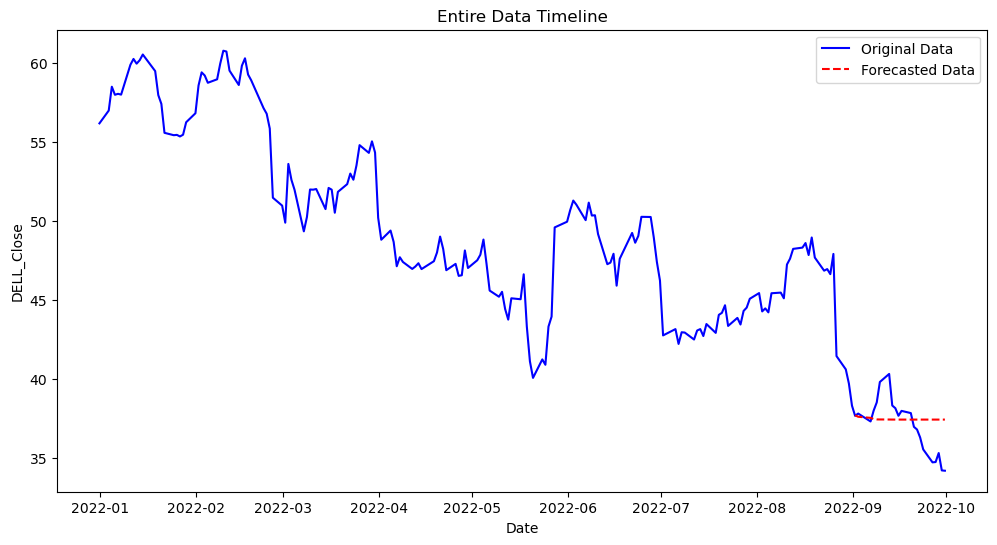

In [60]:
# Combine original and forecasted data for plotting
combined_data = pd.concat([df['DELL_Close'], pd.Series(y_pred_test, index=testing_data.index)], axis=0)

# Plot original and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data, label='Original Data', color='blue')
plt.plot(testing_data.index, y_pred_test, label='Forecasted Data', linestyle='--', color='red')
plt.title('Entire Data Timeline')
plt.xlabel('Date')
plt.ylabel('DELL_Close')
plt.legend()
plt.show()

In [61]:
# Fit ARIMA model to DELL_Close to remove seasonality and trend
arima_model = ARIMA(training_data['DELL_Close'], order=(2,1,0))  # Example order, you may need to tune this
arima_result = arima_model.fit()

# Extract residuals
residuals = arima_result.resid
residuals

/Users/henryfeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryfeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryfeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Date
2022-01-03 16:00:00    56.980000
2022-01-04 16:00:00     1.509993
2022-01-05 16:00:00    -0.610151
2022-01-06 16:00:00    -0.062712
2022-01-07 16:00:00    -0.001865
                         ...    
2022-08-25 16:00:00     1.288931
2022-08-26 16:00:00    -6.513835
2022-08-29 16:00:00    -0.584209
2022-08-30 16:00:00    -0.193919
2022-08-31 16:00:00    -1.261194
Length: 167, dtype: float64

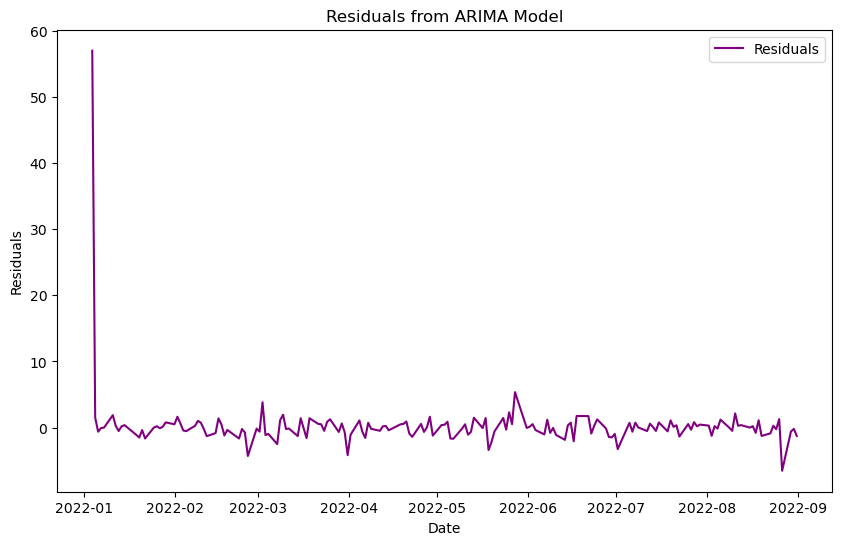

In [62]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(training_data.index, residuals, label='Residuals', color='purple')
plt.title('Residuals from ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()